### Assignment 1

Submission should be in a Jupyter note book (.ipynb)

## A0154735B LI XUANGUANG

1. Implement a function that converts a ```fixed<w, b>``` representation to a real number. Use two's compement representation for negative numbers. The function signature is

   ```python
   def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
   # w: width of the binary representation
   # b: binary point
   ```
   Test the following inputs
   ```python
   fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])
   ```
   ```python
   fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
   ```
   ```python
   fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])
   ```
   


In [1]:
import math

def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
    valuearray = [2**x for x in range(-b, w-b-1)] # Faster computation than using for loop
    value = -bits[0]*(2**(w-b-1)) + sum([a*b for a,b in zip(valuearray,reversed(bits[1:]))]) # Sum of element-wise multiplication
    return value

In [2]:
# Unit Tests
fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

44.75

In [3]:
fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

-13.28125

In [4]:
fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])

-21.25

2. Manually calculate the prices of the following options step by step using two-step Cox Rox Rubinstein (CRR) Binomial tree

    a. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    b. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    c. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    d. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    What is the value of the portfolio that is long (a) and short (b)? How about the portfolio that long (c) and short (d)?
    

In [5]:
from enum import Enum

class PayoffType(str, Enum):
    Call = 'Call'
    Put = 'Put'

def twostepcrr(S, r, vol, payoffType, K, T):
    t = T / 2
    b = math.exp(vol*vol*t+r*t) + math.exp(-r*t)
    u = (b + math.sqrt(b**2 - 4)) / 2
    p = (math.exp(r * t) - (1/u)) / (u - (1/u))
    # set up the last time slice, there are n+1 nodes at the last time slice
    payoffDict = {
        PayoffType.Call: lambda s: max(s-K, 0),
        PayoffType.Put: lambda s: max(K-s, 0),
    }
    vs = [payoffDict[payoffType]( S * u**(2-i-i)) for i in range(2+1)]
    # iterate backward
    for i in range(2-1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i+1):
            vs[j] = math.exp(-r * t) * (vs[j] * p + vs[j+1] * (1-p))
    return vs[0]

In [6]:
twostepcrr(100, 0.03, 0.2, PayoffType.Call, 105, 1)

7.334893644625005

In [7]:
twostepcrr(100, 0.03, 0.2, PayoffType.Put, 105, 1)

9.231674667218368

In [8]:
twostepcrr(100, 0.03, 0.1, PayoffType.Call, 105, 1)

3.555283800757024

In [9]:
twostepcrr(100, 0.03, 0.1, PayoffType.Put, 105, 1)

5.452064823350394

Long (a) Short (b) - value of portfolio = -5

$ value = max(s_T - K, 0) - max(K - s_T, 0) = s_T - K = -5$

In [10]:
# Value = value from call position - value from put position
value = 0 - 5
print(value)

-5


Long (c) Short (d) - value of portfolio = -5

$ value = max(s_T - K, 0) - max(K - s_T, 0) = s_T - K = -5$

In [11]:
# Value = value from call position - value from put position
value = 0 - 5
print(value)

-5


3. Greeks measure the sensitivity of the price of derivatives to a change in underlying asset’s parameters. They are used for hedging and risk
management. The commonly used greeks (risk sensitivities) are:
    * Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
    * Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
    * Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
    * Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
    * Rho: the rate of change in the price of an option in response to a change in the interest rate.

  The greeks are normally not known in closed form since numerical pricers are used. They are approximated by finite differences:

  $ \Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, ~~~\Delta S = 0.1\% S $ \
  $\Gamma = \frac{\partial V^2}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2}$ \
  $v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma } ~~~~~~~\Delta \sigma = 0.1\%$ \
  $\theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t} ~~~~\Delta t = 0.004$ \
  $\rho = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}  ~~~~~\Delta r = 0.0001$

  Implement a Greeks calculater for binomial tree pricer provided below. The signature of the greeks calculator is
      ```python
      def binomialGreeks(S, r, vol, T, strike, greekType) -> float
      ```
  Setting $S = 100, r = 0.03, vol = 0.2$, plot each greeks as a function of strike for 1 year European call option with strike from 50 to 150. Play with different binomial models and see if there is any difference.
  
  Note that in practice, the greeks are rescaled with a pre-defined scaler, so that they give a sense of how much PV (Delta) changes with a typical move of the market. The rescaling is not incorporated in this exercise.

In [12]:
# binomial pricer for exercise 3
from enum import Enum
import math
import numpy as np

class PayoffType(str, Enum):
    Call = 'Call'
    Put = 'Put'

class GreekType(str, Enum):
    Delta = 'Delta'
    Gamma = 'Gamma'
    Vega = 'Vega'
    Theta = 'Theta'
    Rho = 'Rho'
    
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def forwardtime(self, deltat):
        self.expiry -= deltat
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def forwardtime(self, deltat):
        self.expiry -= deltat
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)

def crrCalib(r, vol, t):
    b = math.exp(vol * vol * t + r * t) + math.exp(-r * t)
    u = (b + math.sqrt(b * b - 4)) / 2
    p = (math.exp(r * t) - (1 / u)) / (u - 1 / u)
    return (u, 1/u, p)

def jrrnCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def jreqCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    return (u, d, 1/2)

def tianCalib(r, vol, t):
    v = math.exp(vol * vol * t)
    u = 0.5 * math.exp(r * t) * v * (v + 1 + math.sqrt(v*v + 2*v - 3))
    d = 0.5 * math.exp(r * t) * v * (v + 1 - math.sqrt(v*v + 2*v - 3))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def binomialPricer(S, r, vol, trade, n, calib):
    t = trade.expiry / n
    (u, d, p) = calib(r, vol, t)
    # set up the last time slice, there are n+1 nodes at the last time slice
    vs = [trade.payoff(S * u ** (n - i) * d ** i) for i in range(n + 1)]
    # iterate backward
    for i in range(n - 1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i + 1):
            nodeS = S * u ** (i - j) * d ** j
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j + 1] * (1 - p))
            vs[j] = trade.valueAtNode(t * i, nodeS, continuation)
    return vs[0]

From analysis, it seems that CRR model requries the least discrete steps to have a smooth curve solution; while the rest of the methodologies will require much more discrete steps, and would create a non-smooth curve under the same condition as the CRR model.

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Parameters
S, r, vol, T = 100, 0.03, 0.2, 1
deltaS, deltavol, deltat, deltar = 0.001, 0.001, 0.004, 0.0001
strikerange = [50,150]
calibtype = [crrCalib, jrrnCalib, jreqCalib, tianCalib]
nrange = [1, 100]

# Instantiate options
euroopt = EuropeanOption(1, strikerange[0], PayoffType.Call)

def binomialGreeks(S, r, vol, T, strike, greekType, trade, n, calib) -> float:

    match greekType:
        case GreekType.Delta:
            return (binomialPricer(S+S*deltaS, r, vol, trade, n, calib)-binomialPricer(S-S*deltaS, r, vol, trade, n, calib))/(2*S*deltaS)
        case GreekType.Gamma:
            return (binomialPricer(S+S*deltaS, r, vol, trade, n, calib)+binomialPricer(S-S*deltaS, r, vol, trade, n, calib)-2*binomialPricer(S, r, vol, trade, n, calib))/((deltaS*S)**2)
        case GreekType.Vega:
            return (binomialPricer(S, r, vol+deltavol, trade, n, calib)-binomialPricer(S, r, vol-deltavol, trade, n, calib))/(2*deltavol)
        case GreekType.Theta:
            time0_value=binomialPricer(S, r, vol, trade, n, calib)
            trade.forwardtime(deltat)
            time1_value=binomialPricer(S, r, vol, trade, n, calib)
            return (time1_value-time0_value)/deltat
        case GreekType.Rho:
            return (binomialPricer(S, r+deltar, vol, trade, n, calib)-binomialPricer(S, r-deltar, vol, trade, n, calib))/(2*deltar)
        
    return 0

In [14]:
# Function for plotting figure
def plotfig(delta, gamma, vega, theta, rho, figname):

    figure(figsize=(20, 20), dpi=300)
    fig, ax1 = plt.subplots()
    fig.suptitle(figname, fontsize=10)
    ax2 = ax1.twinx()
    x = np.arange(50, 151, 1)
    ax2.plot(x, delta, 'green', label = 'delta')
    ax2.plot(x, gamma, 'blue', label = 'gamma')
    ax1.plot(x, vega, 'red', label = 'vega')
    ax2.plot(x, theta, 'purple', label = 'theta')
    ax1.plot(x, rho, 'black', label = 'rho')
    ax1.set_xlabel('Strike Price')
    ax1.set_ylabel('Vega, Rho')
    ax2.set_ylabel('Delta, Gamma, Theta')
    ax1.legend(loc=2, prop={'size': 6})
    ax2.legend(loc=1, prop={'size': 6})
    plt.show()

In [15]:
# Function for running greeks analysis
def greekanalysis(optiontype, payoff, calibnum, figname):

    delta = []
    gamma = []
    vega = []
    theta = []
    rho = []

    for i in range(50,151):
        trade = optiontype(T, i, payoff)
        delta_val = binomialGreeks(S, r, vol, T, i, GreekType.Delta, trade, 300, calibtype[calibnum])
        gamma_val = binomialGreeks(S, r, vol, T, i, GreekType.Gamma, trade, 300, calibtype[calibnum])
        vega_val = binomialGreeks(S, r, vol, T, i, GreekType.Vega, trade, 300, calibtype[calibnum])
        theta_val = binomialGreeks(S, r, vol, T, i, GreekType.Theta, trade, 300, calibtype[calibnum])
        rho_val = binomialGreeks(S, r, vol, T, i, GreekType.Rho, trade, 300, calibtype[calibnum])
        delta.append(delta_val)
        gamma.append(gamma_val)
        vega.append(vega_val)
        theta.append(theta_val)
        rho.append(rho_val)

    plotfig(delta, gamma, vega, theta, rho, figname)

#### European Call Options Greeks

<Figure size 6000x6000 with 0 Axes>

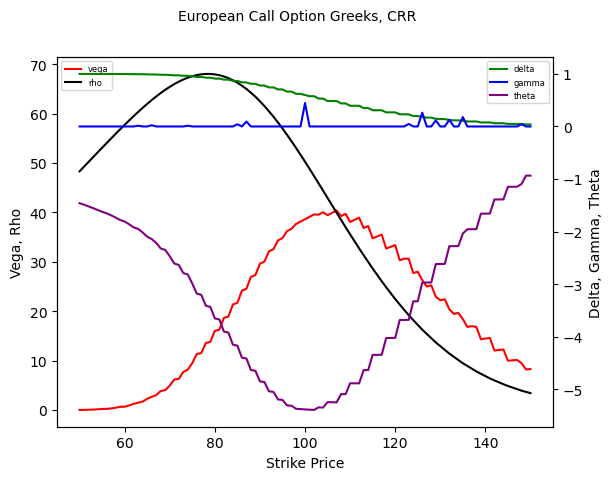

In [16]:
## Euro Call Option CRR Methodology
greekanalysis(EuropeanOption, PayoffType.Call, 0, 'European Call Option Greeks, CRR')

<Figure size 6000x6000 with 0 Axes>

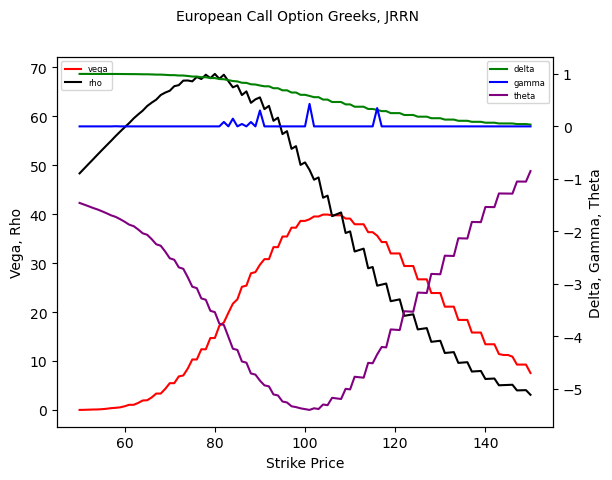

In [17]:
## Euro Call Option JRRN Methodology
greekanalysis(EuropeanOption, PayoffType.Call, 1, 'European Call Option Greeks, JRRN')

<Figure size 6000x6000 with 0 Axes>

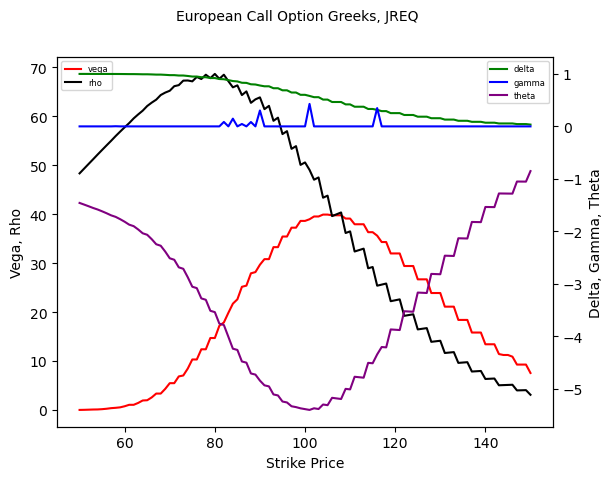

In [18]:
## Euro Call Option JREQ Methodology
greekanalysis(EuropeanOption, PayoffType.Call, 2, 'European Call Option Greeks, JREQ')

<Figure size 6000x6000 with 0 Axes>

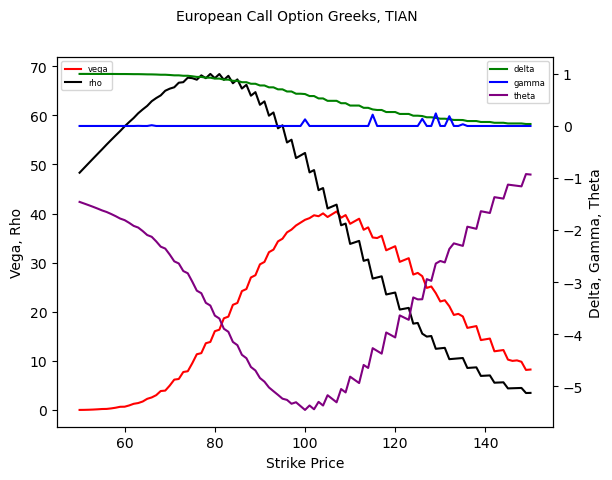

In [19]:
## Euro Call Option TIAN Methodology
greekanalysis(EuropeanOption, PayoffType.Call, 3, 'European Call Option Greeks, TIAN')

##### European Put Option Greeks

<Figure size 6000x6000 with 0 Axes>

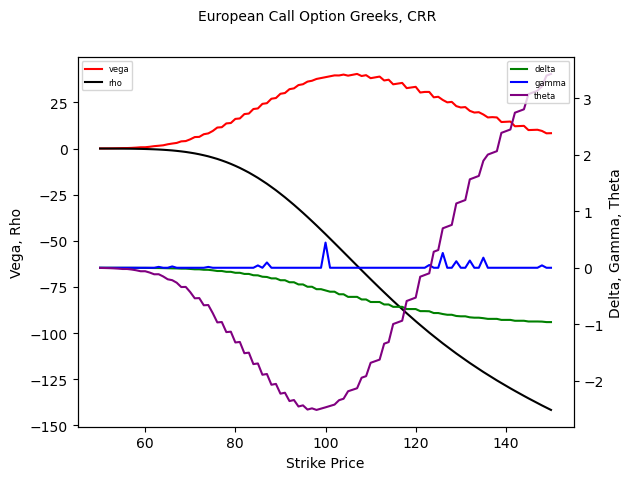

In [20]:
# Euro put Option CRR Methodology
greekanalysis(EuropeanOption, PayoffType.Put, 0, 'European Call Option Greeks, CRR')

<Figure size 6000x6000 with 0 Axes>

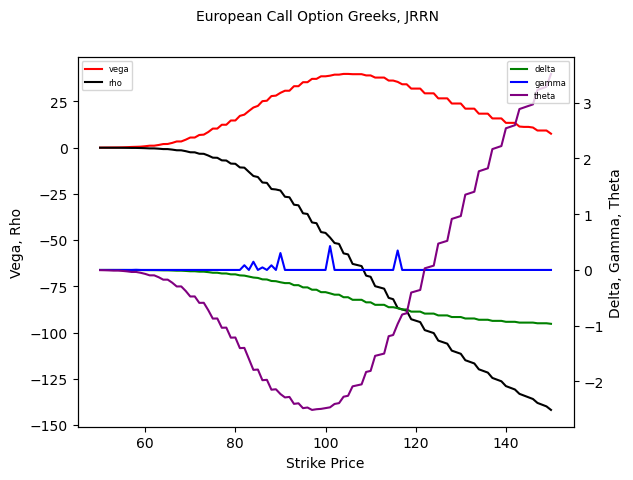

In [21]:
# Euro put Option JRRN Methodology
greekanalysis(EuropeanOption, PayoffType.Put, 1, 'European Call Option Greeks, JRRN')

<Figure size 6000x6000 with 0 Axes>

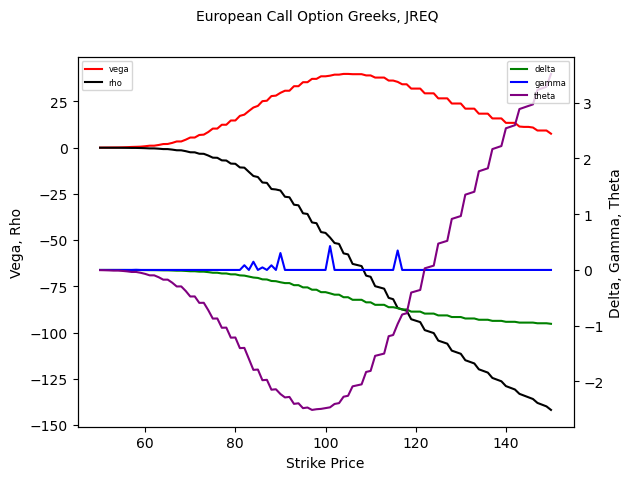

In [22]:
# Euro put Option JREQ Methodology
greekanalysis(EuropeanOption, PayoffType.Put, 2, 'European Call Option Greeks, JREQ')

<Figure size 6000x6000 with 0 Axes>

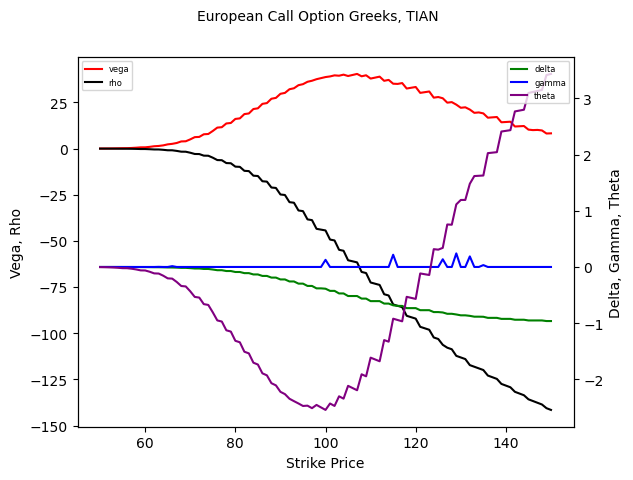

In [23]:
# Euro put Option TIAN Methodology
greekanalysis(EuropeanOption, PayoffType.Put, 3, 'European Call Option Greeks, TIAN')

#### American Call Option Greeks

<Figure size 6000x6000 with 0 Axes>

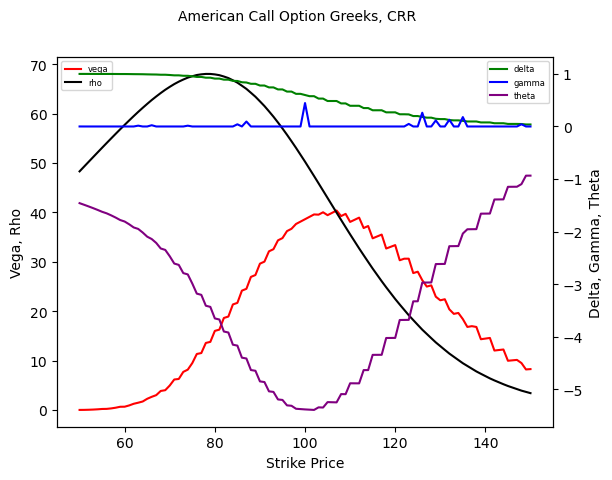

In [24]:
# American call Option CRR Methodology
greekanalysis(AmericanOption, PayoffType.Call, 0, 'American Call Option Greeks, CRR')

<Figure size 6000x6000 with 0 Axes>

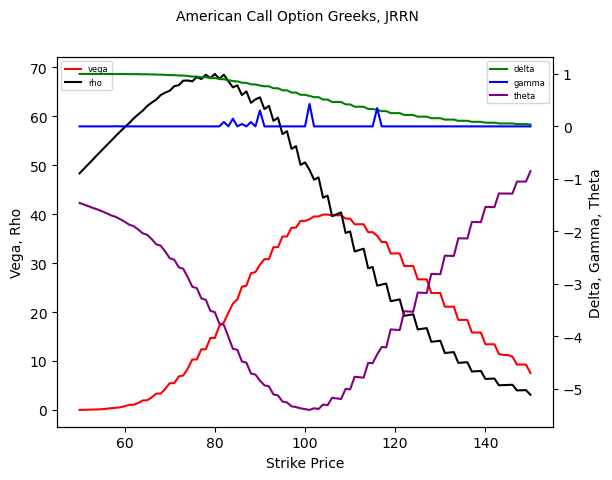

In [25]:
# American call Option JRRN Methodology
greekanalysis(AmericanOption, PayoffType.Call, 1, 'American Call Option Greeks, JRRN')

<Figure size 6000x6000 with 0 Axes>

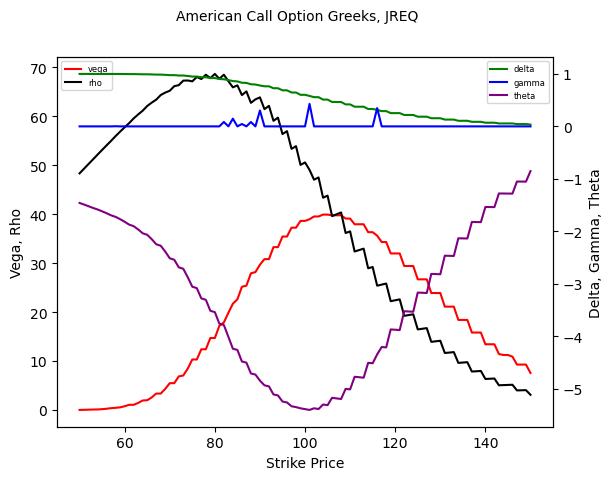

In [26]:
# American call Option JREQ Methodology
greekanalysis(AmericanOption, PayoffType.Call, 2, 'American Call Option Greeks, JREQ')

<Figure size 6000x6000 with 0 Axes>

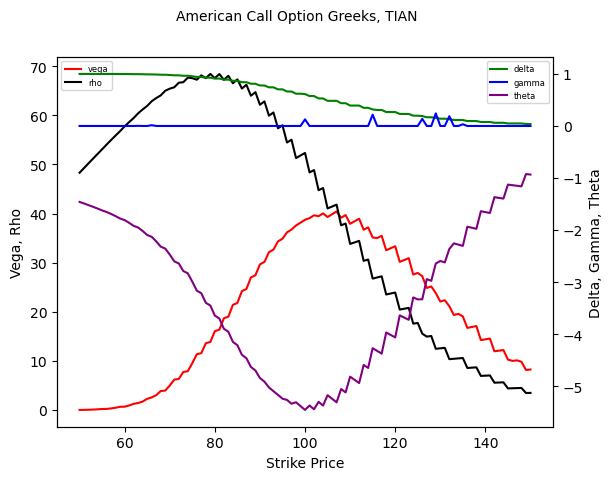

In [27]:
# American call Option TIAN Methodology
greekanalysis(AmericanOption, PayoffType.Call, 3, 'American Call Option Greeks, TIAN')

#### American Put Option Greeks

<Figure size 6000x6000 with 0 Axes>

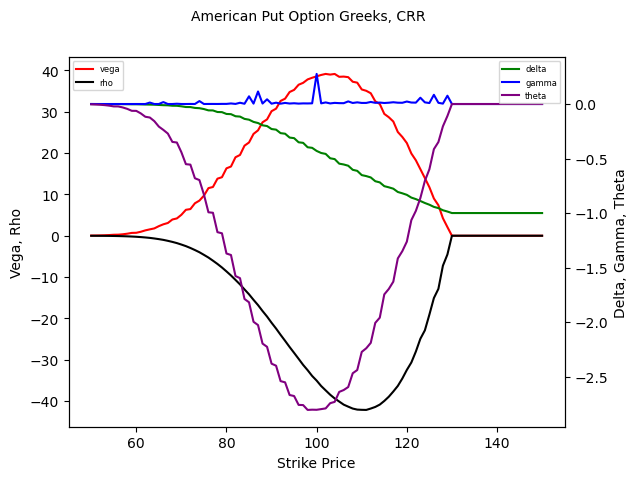

In [28]:
# American put Option CRR Methodology
greekanalysis(AmericanOption, PayoffType.Put, 0, 'American Put Option Greeks, CRR')

<Figure size 6000x6000 with 0 Axes>

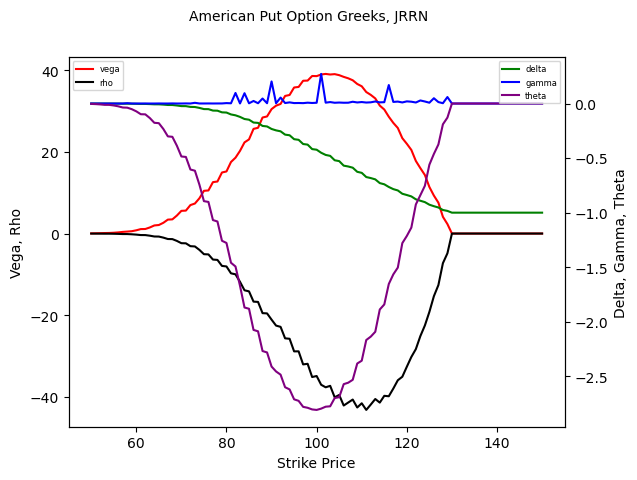

In [29]:
# American put Option JRRN Methodology
greekanalysis(AmericanOption, PayoffType.Put, 1, 'American Put Option Greeks, JRRN')

<Figure size 6000x6000 with 0 Axes>

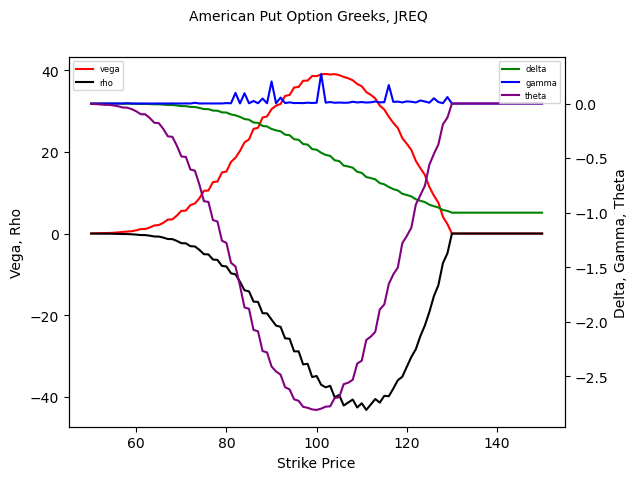

In [30]:
# American put Option JREQ Methodology
greekanalysis(AmericanOption, PayoffType.Put, 2, 'American Put Option Greeks, JREQ')

<Figure size 6000x6000 with 0 Axes>

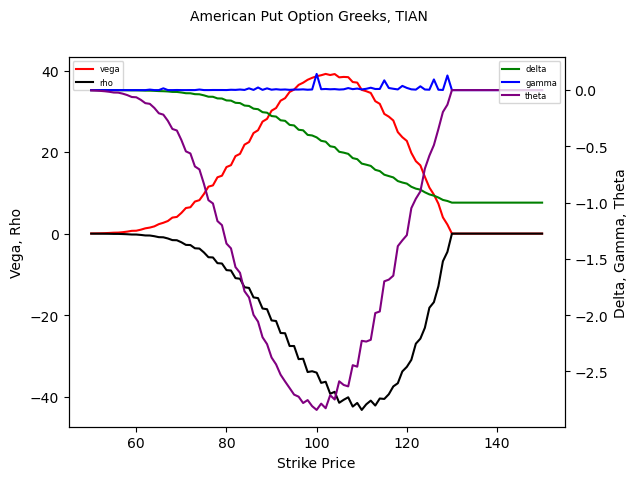

In [31]:
# American put Option TIAN Methodology
greekanalysis(AmericanOption, PayoffType.Put, 3, 'American Put Option Greeks, TIAN')